In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
sales = pd.read_csv("/Users/user/Downloads//advertising.csv")
print(sales.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
sales.shape

(200, 5)

In [5]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
sales.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

/var/folders/q6/v17312c94b3gc98vt17wv7w00000gn/T/ipykernel_79243/1352795744.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


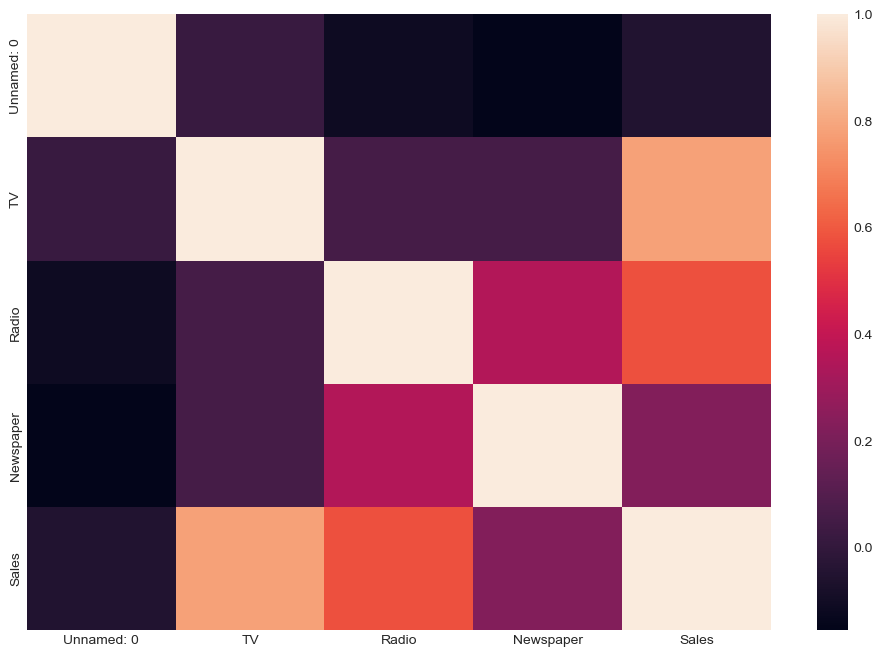

In [16]:
plt.figure(figsize=(12,8))
plt.style.use("seaborn-whitegrid")
sns.heatmap(sales.corr())
plt.show()

In [27]:
sales.drop(["Unnamed: 0"], axis=1)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
x = sales.drop(["Sales"], 1)
y = sales["Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)

/var/folders/q6/v17312c94b3gc98vt17wv7w00000gn/T/ipykernel_79243/1578540625.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = sales.drop(["Sales"], 1)


In [32]:
from sklearn.metrics import mean_absolute_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, ypred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r_squared = model.score(x_test, y_test)
print("R-squared Score:", r_squared)


Mean Absolute Error: 1.4650601050102927
R-squared Score: 0.8986489151417081


Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted sales values and the actual sales values in the test set. In this case, the MAE is approximately 1.47. This means, on average, the model's predictions are off by around 1.47 units of sales.

R-squared Score: The R-squared score indicates the proportion of the variance in the sales data that is explained by the independent variables (TV, Radio, Newspaper advertising budgets) in the model. Here, the R-squared score is approximately 0.90, meaning that approximately 90% of the variance in sales can be explained by the advertising budgets.

These metrics suggest that the linear regression model performs well in predicting sales based on the allocated budgets for TV, Radio, and Newspaper advertising. The low MAE and high R-squared score indicate that the model's predictions are close to the actual sales values and that a significant portion of the variability in sales is captured by the advertising budgets.